  # **TRABALHO PRÁTICO 2 - IBD**
  ##### RELAÇÃO ENTRE FOCOS DE CALOR E POPULAÇÃO DE CADA ESTADO BRASILEIRO

  Notebook baseado no tp1 de IBD
  
  **Integrantes:**
  * Carla Beatriz Ferreira
  * Gabriele Pinheiro Sá
  * João Marcos Ribeiro Tolentino
  * Manuela Monteiro Fernandes de Oliveira
  * Vitor Terra Mattos do Patrocínio Veloso


**Bancos de Dados Utilizados:**

* Banco de dados de focos de calor por estados, pelo Sistema Nacional de Informações Florestais - SNIF, disponivel em https://dados.gov.br/dados/conjuntos-dados/snif

* ![meses_zero_focos.png](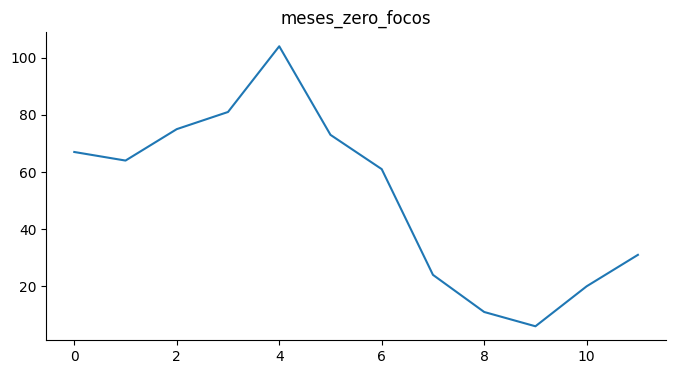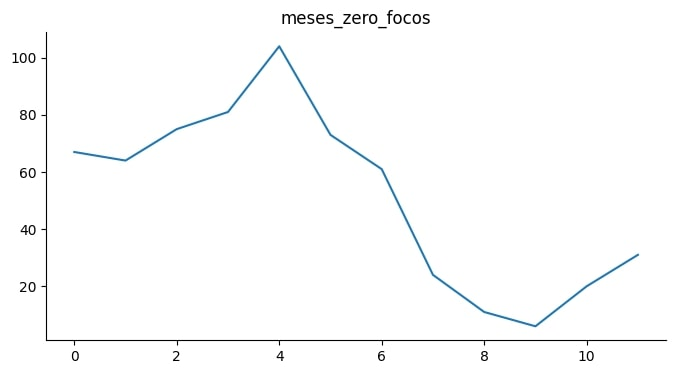)Banco de dados de população brasileira, pelo Instituto Brasileiro de Geografia e Estatística - IBGE, disponível em https://basedosdados.org/dataset/d30222ad-7a5c-4778-a1ec-f0785371d1ca?table=2440d076-8934-471f-8cbe-51faae387c66

In [1]:
#NÃO ALTERE AS LINHAS ABAIXO
import sys
#!{sys.executable} -m pip install sqlite3
!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install csv
!{sys.executable} -m pip install gdown

In [2]:
import sqlite3 as sql3
import pandas as pd
import csv
import gdown

## Banco de Dados
**Bancos de Dados Utilizados:**

* Banco de dados de focos de calor por estados, pelo Sistema Nacional de Informações Florestais - SNIF, disponivel em https://dados.gov.br/dados/conjuntos-dados/snif

* Banco de dados de população brasileira, pelo Instituto Brasileiro de Geografia e Estatística - IBGE, disponível em https://basedosdados.org/dataset/d30222ad-7a5c-4778-a1ec-f0785371d1ca?table=2440d076-8934-471f-8cbe-51faae387c66

In [3]:
!gdown "16I3LDpfcOfZFFuhApZ9h1AKF-c5C5pyj" #arquivo SQL de focos de calor no google drive

Downloading...
From: https://drive.google.com/uc?id=16I3LDpfcOfZFFuhApZ9h1AKF-c5C5pyj
To: /content/focosdecalornormalizado.sql
100% 334k/334k [00:00<00:00, 92.6MB/s]


In [4]:
con = sql3.connect(":memory:")
sql_file = open('focosdecalornormalizado.sql', encoding="utf8")
cur = con.cursor()
db = sql_file.read()
cur.executescript(db)
con.commit()

## Estrutura das Tabelas do Banco de Dados De Focos e de Populacão
A tabela de Focos de Calor possui 6454 registros (linhas) que possuem informações dos anos 1998 até 2017
Por sua vez, a tabela de População possui 837 registros que possuem informações dos anos de 1991 a 2021

### TABELA ESTADO

In [5]:
query = "PRAGMA table_info('Estado')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,sigla,character varying(5),0,None,1
1,1,nome,character varying(50),1,None,0
2,2,regiao,character varying(20),1,None,0


### TABELA FOCOSDECALOR

In [6]:
query = "PRAGMA table_info('focosDeCalor')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,ano,INTEGER,1,None,1
1,1,sigla_estado,character varying(5),1,None,2
2,2,mes,character varying(20),1,None,3
3,3,numero_focos,INTEGER,1,None,0
4,4,periodo,character varying(20),1,None,0


### TABELA POPULACAODOSESTADOS

In [7]:
query = "PRAGMA table_info('PopulacaoDosEstados')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,sigla_uf,character varying(5),1,None,1
1,1,ano,INTEGER,1,None,2
2,2,populacao,INTEGER,1,None,0


## Arquivo de Resultados
Na célula 10 abaixo, você irá colocar o numero da sua matrícula. Essa é a primeira alteração necessária para executar o TP. A partir das células 10 e 11, o arquivo de resultado será gerado.


In [8]:
alunos = "Carla_Gabriele_Joao_Manuela_Vitor" #nome da variavel antigo!

In [9]:
#NÃO ALTERE AS LINHAS ABAIXO
tp1_csv = alunos+".csv"
queries = open(tp1_csv, 'w')
writer = csv.writer(queries, delimiter=';')
writer.writerow(["Query Number", "Row Count", "Query"])

30

## Função de Consulta
A função abaixo executa a consulta, exibe o retorno da consulta no banco e grava os dados necessários no arquivo resultado.

In [10]:
#NÃO ALTERE AS LINHAS ABAIXO
def runQuery(query, query_name):
  df = pd.read_sql(query, con)
  query_size = df.shape[0]
  writer.writerow([query_name, query_size, query])
  display(df)

## ANALISES EXPERIMENTAIS PARA PANORAMA GERAL DA SITUAÇÃO


### 1 - CONSULTANDO TOP 10 POPULAÇÕES EM 2017

In [11]:
a1 = '''
SELECT sigla_uf, populacao, regiao
FROM PopulacaoDosEstados p , Estado e
WHERE p.sigla_uf = e.sigla
AND ano = 2017
ORDER BY populacao DESC
LIMIT 10;
'''

runQuery(a1, "a1")

,sigla_uf,populacao,regiao
0,SP,45094866,Sudeste
1,MG,21119536,Sudeste
2,RJ,16718956,Sudeste
3,BA,15344447,Nordeste
4,RS,11322895,Sul
5,PR,11320892,Sul
6,PE,9473266,Nordeste
7,CE,9020460,Nordeste
8,PA,8366628,Norte
9,SC,7001161,Sul


### 2 - Consultando top 10 maiores focos de calor geral

In [12]:
a2 = '''
SELECT sigla_uf, mes, p.ano, numero_focos, regiao
FROM PopulacaoDosEstados p, focosDeCalor f,  Estado e
WHERE p.ano = f.ano
AND p.sigla_uf = e.sigla
AND p.sigla_uf = f.sigla_estado
ORDER BY numero_focos DESC
LIMIT 10;
'''

runQuery(a2, "a2")

,sigla_uf,mes,ano,numero_focos,regiao
0,MT,Setembro,2007,25963,Centro-Oeste
1,PA,Setembro,2017,25004,Norte
2,MT,Setembro,2004,24994,Centro-Oeste
3,MT,Setembro,2017,23945,Centro-Oeste
4,MT,Setembro,2005,20551,Centro-Oeste
5,MT,Agosto,1999,18566,Centro-Oeste
6,MT,Setembro,2010,18366,Centro-Oeste
7,PA,Agosto,2010,18130,Norte
8,MT,Setembro,2003,15790,Centro-Oeste
9,PA,Agosto,2002,15664,Norte


2.1 - NUMERO DE MESES COM ZERO FOCOS EM ALGUM ESTADO

In [13]:
b2 = '''
SELECT mes, COUNT(CASE WHEN f.numero_focos = 0 THEN 1 ELSE NULL END) AS meses_zero_focos
FROM focosDeCalor f
GROUP BY f.mes
ORDER BY
  CASE mes
    WHEN 'Janeiro' THEN 1
    WHEN 'Fevereiro' THEN 2
    WHEN 'Marco' THEN 3
    WHEN 'Abril' THEN 4
    WHEN 'Maio' THEN 5
    WHEN 'Junho' THEN 6
    WHEN 'Julho' THEN 7
    WHEN 'Agosto' THEN 8
    WHEN 'Setembro' THEN 9
    WHEN 'Outubro' THEN 10
    WHEN 'Novembro' THEN 11
    WHEN 'Dezembro' THEN 12
    ELSE 13
  END;
'''
runQuery(b2, "b2")

,mes,meses_zero_focos
0,Janeiro,67
1,Fevereiro,64
2,Marco,75
3,Abril,81
4,Maio,104
5,Junho,73
6,Julho,61
7,Agosto,24
8,Setembro,11
9,Outubro,6


In [14]:
#CLICLAR EM SUGGEST CHARTS NO DE CIMA E EXECUTAR
#from matplotlib import pyplot as plt
#_df_1['meses_zero_focos'].plot(kind='line', figsize=(8, 4), title='meses_zero_focos')
#plt.gca().spines[['top', 'right']].set_visible(False)

### 3 - Quantidades de focos e população em cada ano em cada estado (ordenado por ano mais recente e depois por mais focos)

In [15]:
a3 = """
SELECT p.ano as "Ano", p.sigla_uf as "Estado", p.populacao as "Populacao", temp.numero_de_focos_no_ano as "Focos por ano"
FROM (
  SELECT ano, sigla_estado, SUM(numero_focos) AS numero_de_focos_no_ano
  FROM focosDeCalor
  GROUP BY sigla_estado, ano) AS temp, PopulacaoDosEstados p
WHERE p.ano = temp.ano AND p.sigla_uf = temp.sigla_estado ORDER BY p.ano DESC, numero_de_focos_no_ano DESC;
"""

runQuery(a3, "a3")


,Ano,Estado,Populacao,Focos por ano
0,2017,PA,8366628,59771
1,2017,MT,3344544,43607
2,2017,MA,7000229,30916
3,2017,TO,1550194,22317
4,2017,AM,4063614,14798
...,...,...,...,...
535,1998,RJ,13681410,102
536,1998,AL,2688117,86
537,1998,SC,5028339,59
538,1998,RR,260705,21


### 4 - Valor medio de focos por ano em cada estado

In [16]:
a4 = '''
SELECT e.nome AS "Estado", f.ano, AVG(f.numero_focos) AS media_focos
FROM focosDeCalor f, Estado e
WHERE f.sigla_estado = e.sigla
GROUP BY e.nome, f.ano
ORDER BY e.nome, f.ano;
'''
#ORDER BY media_focos
runQuery(a4, "a4")

,Estado,ano,media_focos
0,Acre,1998,60.833333
1,Acre,1999,27.750000
2,Acre,2000,36.166667
3,Acre,2001,69.000000
4,Acre,2002,290.916667
...,...,...,...
535,Tocantins,2013,813.000000
536,Tocantins,2014,1242.666667
537,Tocantins,2015,1450.250000
538,Tocantins,2016,1237.833333


### 5 - INFORMAÇÕES DA QUANTIDADE DE ESTADOS E DE POPULAÇÃO POR REGIÃO DO BRASIL (2017)

In [17]:
a5 = '''
SELECT e.regiao AS regiao, COUNT(DISTINCT e.sigla) AS quantidade_estados, SUM(populacao) as populacao_da_regiao_2017
FROM Estado e, PopulacaoDosEstados p
WHERE p.sigla_uf = e.sigla
AND p.ano = 2017
GROUP BY e.regiao
ORDER BY populacao_da_regiao_2017 DESC;
'''

runQuery(a5, "a5")


,regiao,quantidade_estados,populacao_da_regiao_2017
0,Sudeste,4,86949714
1,Nordeste,9,57254159
2,Sul,3,29644948
3,Norte,7,17936201
4,Centro-Oeste,4,15875907


5.1 - INFORMAÇÕES DA QUANTIDADE DE ESTADOS E DE POPULAÇÃO POR REGIÃO DO BRASIL (2000)

In [18]:
b5 = '''
SELECT e.regiao AS regiao, COUNT(DISTINCT e.sigla) AS quantidade_estados, SUM(populacao) as populacao_da_regiao_2000
FROM Estado e, PopulacaoDosEstados p
WHERE p.sigla_uf = e.sigla
AND p.ano = 2000
GROUP BY e.regiao
ORDER BY populacao_da_regiao_2000 DESC;
'''

runQuery(b5, "b5")

,regiao,quantidade_estados,populacao_da_regiao_2000
0,Sudeste,4,72430193
1,Nordeste,9,47782486
2,Sul,3,25110347
3,Norte,7,12911171
4,Centro-Oeste,4,11638657


### 6 - Valor total de focos por ano em cada regiao do Brasil

In [19]:
a6 = '''
SELECT e.regiao AS regiao,
       f.ano,
       SUM(f.numero_focos) AS total_focos
FROM focosDeCalor f
JOIN Estado e ON f.sigla_estado = e.sigla
GROUP BY e.regiao, f.ano
ORDER BY e.regiao, f.ano;
'''
runQuery(a6, "a6")

,regiao,ano,total_focos
0,Centro-Oeste,1998,43722
1,Centro-Oeste,1999,62373
2,Centro-Oeste,2000,32994
3,Centro-Oeste,2001,43118
4,Centro-Oeste,2002,76181
...,...,...,...
95,Sul,2013,3893
96,Sul,2014,5581
97,Sul,2015,4560
98,Sul,2016,9792


In [20]:
'''
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['regiao'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='total_focos', y='regiao', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
'''

"\nfrom matplotlib import pyplot as plt\nimport seaborn as sns\nfigsize = (12, 1.2 * len(_df_9['regiao'].unique()))\nplt.figure(figsize=figsize)\nsns.violinplot(_df_9, x='total_focos', y='regiao', inner='stick', palette='Dark2')\nsns.despine(top=True, right=True, bottom=True, left=True)\n"

7 - Valor medio de focos em cada regiao do Brasil (somados os anos de analise):

In [21]:
a7 = '''
SELECT e.regiao AS regiao,
       SUM(p.populacao) / COUNT(DISTINCT p.ano) AS media_populacao_por_ano
FROM Estado e
JOIN PopulacaoDosEstados p ON p.sigla_uf = e.sigla
WHERE p.ano BETWEEN 1998 AND 2017
GROUP BY e.regiao
ORDER BY media_populacao_por_ano DESC;
'''

runQuery(a7, "a7")


,regiao,media_populacao_por_ano
0,Sudeste,79024172
1,Nordeste,52044184
2,Sul,27129984
3,Norte,15113396
4,Centro-Oeste,13497593


In [22]:
'''
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['regiao'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='media_populacao_por_ano', y='regiao', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
'''

"\nfrom matplotlib import pyplot as plt\nimport seaborn as sns\nfigsize = (12, 1.2 * len(_df_20['regiao'].unique()))\nplt.figure(figsize=figsize)\nsns.violinplot(_df_20, x='media_populacao_por_ano', y='regiao', inner='stick', palette='Dark2')\nsns.despine(top=True, right=True, bottom=True, left=True)\n"

In [23]:
a7 = '''
SELECT e.regiao AS regiao, AVG(f.numero_focos) AS media_focos
FROM focosDeCalor f, Estado e
WHERE f.sigla_estado = e.sigla
GROUP BY e.regiao
ORDER BY media_focos DESC;
'''

runQuery(a7, "a7")

,regiao,media_focos
0,Centro-Oeste,1006.511506
1,Norte,812.263598
2,Nordeste,450.047420
3,Sudeste,274.211297
4,Sul,155.721060


In [24]:
'''
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['regiao'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='media_focos', y='regiao', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
'''

"\nfrom matplotlib import pyplot as plt\nimport seaborn as sns\nfigsize = (12, 1.2 * len(_df_24['regiao'].unique()))\nplt.figure(figsize=figsize)\nsns.violinplot(_df_24, x='media_focos', y='regiao', inner='stick', palette='Dark2')\nsns.despine(top=True, right=True, bottom=True, left=True)\n"

8 - Média do número de focos no decorrer dos anos

In [25]:
a8 = '''
SELECT
ROUND(AVG(numero_focos),2) AS media_focos,
ano
FROM focosDeCalor
GROUP BY ano
ORDER BY ano ASC;
'''
runQuery(a8, "a8")

,media_focos,ano
0,382.35,1998
1,415.42,1999
2,313.36,2000
3,449.28,2001
4,727.75,2002
5,726.06,2003
6,834.52,2004
7,743.10,2005
8,422.50,2006
9,713.74,2007


In [26]:
'''
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ano']
  ys = series['media_focos']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('ano', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ano')
_ = plt.ylabel('media_focos')
'''

"\nfrom matplotlib import pyplot as plt\nimport seaborn as sns\ndef _plot_series(series, series_name, series_index=0):\n  from matplotlib import pyplot as plt\n  import seaborn as sns\n  palette = list(sns.palettes.mpl_palette('Dark2'))\n  xs = series['ano']\n  ys = series['media_focos']\n\n  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])\n\nfig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')\ndf_sorted = _df_13.sort_values('ano', ascending=True)\n_plot_series(df_sorted, '')\nsns.despine(fig=fig, ax=ax)\nplt.xlabel('ano')\n_ = plt.ylabel('media_focos')\n"

9 - Média de focos por temporada de cada população

In [27]:
a9 = '''
SELECT
ROUND(AVG(numero_focos),2) AS media_focos,
f.ano,
p.populacao
FROM focosDeCalor f
INNER JOIN populacaoDosEstados p
ON f.sigla_estado = p.sigla_uf
GROUP BY f.ano, p.populacao
ORDER BY p.populacao DESC ;
'''
runQuery(a9, "a9")

,media_focos,ano,populacao
0,266.33,1998,46649132
1,454.92,1999,46649132
2,344.00,2000,46649132
3,243.83,2001,46649132
4,294.92,2002,46649132
...,...,...,...
16735,82.83,2013,217583
16736,155.67,2014,217583
16737,171.83,2015,217583
16738,291.58,2016,217583


10 - Desvio padrão da população de cada estado

---



In [28]:
""" #Não utilizada
a10 = '''
SELECT sigla, ano, SQRT(SUM(media_menos_xi_quadrado) / COUNT(*))

FROM

(SELECT sigla, ano, mes, POWER(numero_focos - media_focos, 2) AS media_menos_xi_quadrado

FROM

(SELECT medias.sigla, valores_mensais.ano, valores_mensais.mes, valores_mensais.populacao, medias.media_pop

FROM

(SELECT p.ano, p.mes, p.sigla_estado, p.numero_focos
FROM populacaoDosEstados p
ORDER BY p.ano) AS valores_mensais
,
(SELECT e.sigla, p.ano, AVG(p.populacao) AS media_pop
FROM populacaoDosEstados p, Estado e
WHERE p.sigla_estado = e.sigla
GROUP BY e.sigla, p.ano
ORDER BY e.sigla, p.ano) AS medias

WHERE valores_mensais.sigla_estado = medias.sigla AND valores_mensais.ano = medias.ano))

GROUP BY ano, sigla;
'''

runQuery(a10, "a10")
"""

' #Não utilizada\na10 = \'\'\'\nSELECT sigla, ano, SQRT(SUM(media_menos_xi_quadrado) / COUNT(*))\n\nFROM\n\n(SELECT sigla, ano, mes, POWER(numero_focos - media_focos, 2) AS media_menos_xi_quadrado\n\nFROM\n\n(SELECT medias.sigla, valores_mensais.ano, valores_mensais.mes, valores_mensais.populacao, medias.media_pop\n\nFROM\n\n(SELECT p.ano, p.mes, p.sigla_estado, p.numero_focos\nFROM populacaoDosEstados p\nORDER BY p.ano) AS valores_mensais\n,\n(SELECT e.sigla, p.ano, AVG(p.populacao) AS media_pop\nFROM populacaoDosEstados p, Estado e\nWHERE p.sigla_estado = e.sigla\nGROUP BY e.sigla, p.ano\nORDER BY e.sigla, p.ano) AS medias\n\nWHERE valores_mensais.sigla_estado = medias.sigla AND valores_mensais.ano = medias.ano))\n\nGROUP BY ano, sigla;\n\'\'\'\n\nrunQuery(a10, "a10")\n'

11 - Desvio padrão dos focos de **calor** de cada estado


In [29]:
a11 = '''

SELECT sigla, ano, SQRT(SUM(media_menos_xi_quadrado) / COUNT(*))

FROM

(SELECT sigla, ano, mes, POWER(numero_focos - media_focos, 2) AS media_menos_xi_quadrado

FROM

(SELECT medias.sigla, valores_mensais.ano, valores_mensais.mes, valores_mensais.numero_focos, medias.media_focos

FROM

(SELECT f.ano, f.mes, f.sigla_estado, f.numero_focos
FROM focosDeCalor f
ORDER BY f.ano) AS valores_mensais
,
(SELECT e.sigla, f.ano, AVG(f.numero_focos) AS media_focos
FROM focosDeCalor f, Estado e
WHERE f.sigla_estado = e.sigla
GROUP BY e.sigla, f.ano
ORDER BY e.sigla, f.ano) AS medias

WHERE valores_mensais.sigla_estado = medias.sigla AND valores_mensais.ano = medias.ano))

GROUP BY ano, sigla;

'''
runQuery(a11, "a11")

,sigla,ano,SQRT(SUM(media_menos_xi_quadrado) / COUNT(*))
0,AC,1998,139.921307
1,AL,1998,10.667969
2,AM,1998,111.855437
3,AP,1998,40.765249
4,BA,1998,869.918591
...,...,...,...
535,RS,2017,303.881094
536,SC,2017,266.555128
537,SE,2017,9.980146
538,SP,2017,813.581126


# Finalizando o Banco de Dados e o Arquivo de Consultas gerado:

In [30]:
#NÃO ALTERE AS LINHAS ABAIXO
queries.close()
con.close()

## Compactando Arquivos


In [31]:
!ls


Carla_Gabriele_Joao_Manuela_Vitor.csv  focosdecalornormalizado.sql  sample_data


In [32]:
!zip -r "alunos.zip" "TP2.ipynb" "Carla_Gabriele_Joao_Manuela_Vitor.csv"

	zip warning: name not matched: TP2.ipynb
  adding: Carla_Gabriele_Joao_Manuela_Vitor.csv (deflated 73%)


**LEMBRE-SE:** Após finalizar todas as consultas, clique em *Kernel -> Restart and Run All* no ambiente em que estiver usando (Jupyter ou Google Colab)

Caso esteja usando o Google Colab, colocar manualmente o arquivo .ipynb no zip